# Intermediate Statistic
- Probability
  - PMF 
  - CDF
- Distribution & Skewness
- Correlation
- Statistical Analysis
  - Scatter plot
  - Histogram
  - Boxplot
- Handling outlier data using IQR


In [40]:
# import library
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
# reading dataset
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv")
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


## Probability

In [5]:
# PMF
loan_data['Gender'].value_counts(normalize=True)

Male      0.817048
Female    0.182952
Name: Gender, dtype: float64

In [16]:
# PMF
Pmf.from_seq(loan_data['Gender'], normalize=True)

,probs
Female,0.182952
Male,0.817048


In [17]:
# CDF
CDF_error = Pmf.from_seq(loan_data['Gender'], normalize=True)
CDF_error = pd.DataFrame({'Gender':CDF_error.index, "PMF":CDF_error.values})

# visulization
px.bar(CDF_error, x='Gender', y='PMF', width=750, height=550)

In [18]:
# CDF
CDF_error = Pmf.from_seq(loan_data['LoanAmount'], normalize=True)
CDF_error = pd.DataFrame({'LoanAmount':CDF_error.index, "PMF":CDF_error.values})

# visulization
px.bar(CDF_error, x='LoanAmount', y='PMF', width=750, height=550)

In [21]:
# CDF
CDF_true = Cdf.from_seq(loan_data['LoanAmount'])
CDF_true = pd.DataFrame({'LoanAmount':CDF_true.index, "CDF":CDF_true.values})

# visulization
px.line(CDF_true, x='LoanAmount', y='CDF', width=750, height=550)

In [34]:
## Exercise PMF from Loan_Amount_Term column and show the CDF from Loan_Amount_Term

PMF_loan_amt_term = Pmf.from_seq(loan_data['Loan_Amount_Term'], normalize=True)
PMF_loan_amt_term = pd.DataFrame({'Loan_Amount_Term':PMF_loan_amt_term.index, 'PMF':PMF_loan_amt_term.values})
PMF_loan_amt_term

CDF_loan_amt_term = Cdf.from_seq(loan_data['Loan_Amount_Term'], normalize=True)
CDF_loan_amt_term = pd.DataFrame({'Loan_Amount_Term':CDF_loan_amt_term.index, 'CDF':CDF_loan_amt_term.values})


In [32]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=PMF_loan_amt_term['Loan_Amount_Term'], y=PMF_loan_amt_term['PMF']), row=1, col=1
)

fig.add_trace(
    go.Line(x=CDF_loan_amt_term['Loan_Amount_Term'], y=CDF_loan_amt_term['CDF']), row=1, col=2
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Distribution & Skewness

Skewness:  2.7954233031586915


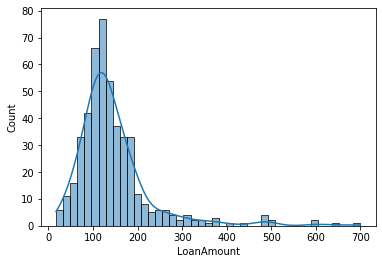

In [47]:
# Distribution & Skewness
sns.histplot(data=loan_data, x='LoanAmount', kde=True)
print("Skewness: ", loan_data['LoanAmount'].skew())
plt.show()

Skewness:  -2.3068124031504924


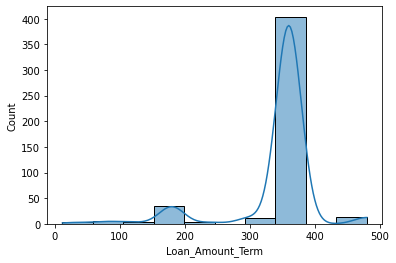

In [49]:
# Distribution & Skewness
sns.histplot(data=loan_data, x='Loan_Amount_Term', kde=True)
print("Skewness: ", loan_data['Loan_Amount_Term'].skew())
plt.show()

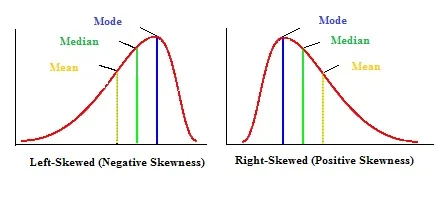

### Correlation

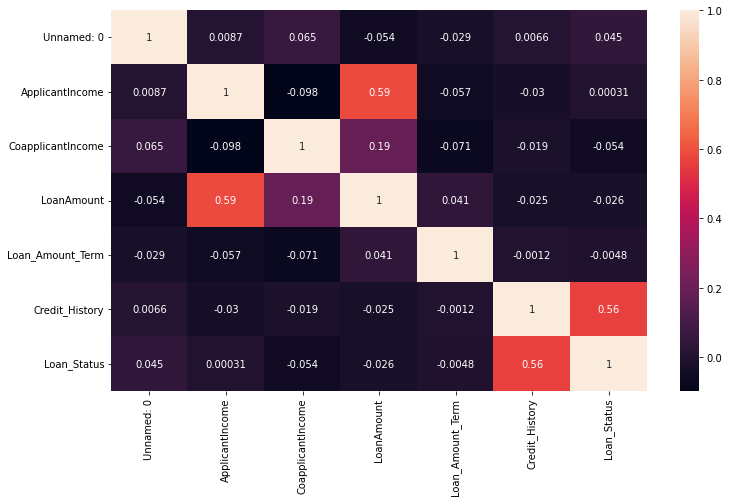

In [50]:
plt.figure(figsize=(12,7))
sns.heatmap(loan_data.corr(), annot=True)
plt.show()

### Statistical Analysis

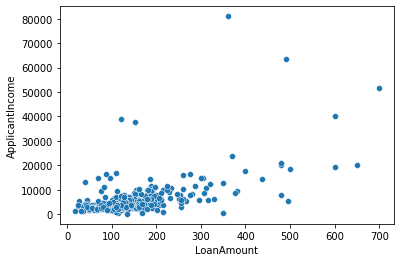

In [52]:
# Scatter Plot
sns.scatterplot(data=loan_data, x='LoanAmount', y='ApplicantIncome')
plt.show()

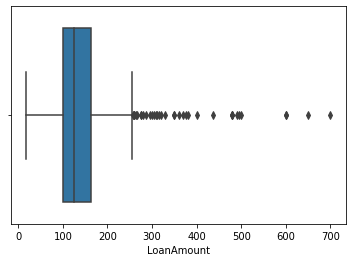

In [53]:
# Boxplot
sns.boxplot(data=loan_data, x='LoanAmount')
plt.show()

### Handling Outlier

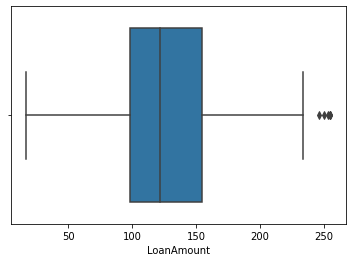

In [60]:
# Loan Amount exclude outlier
Q1 = loan_data['LoanAmount'].quantile(0.25)
Q3 = loan_data['LoanAmount'].quantile(0.75)

IQR = Q3-Q1
lower_whishker = Q1-1.5*(IQR)
higher_whisker = Q3+1.5*(IQR)

la_eclude_out = loan_data[(loan_data['LoanAmount'] >= lower_whishker) & (loan_data['LoanAmount'] <= higher_whisker)]

# Boxplot
sns.boxplot(data=la_eclude_out, x='LoanAmount')
plt.show()